# 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

## (1) 데이터 가져오기

- sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
- diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [281]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# load_diabetes 데이터 가져오기 
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

print(dir(diabetes))

['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename']


#### 파라미터인 as_frame을 True로 설정하면 판다스 데이터프레임으로 사용할 수 있다는데. 공식 사이트를 봐도 어떻게 사용하는지 모르겠다 

REF) 
https://yhyun225.tistory.com/11
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

In [282]:
type(diabetes)

sklearn.utils.Bunch

In [283]:
# diabetes의 data를 df_X에 저장
df_X = diabetes.data

print(df_X.shape)
df_X

(442, 10)


array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [284]:
# diabetes의 target을 df_y에 저장
df_y = diabetes.target

print(df_y.shape)
df_y

(442,)


array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [285]:
# diabetes의 target을 re_y에 따로 저장
re_y = diabetes.target.reshape(-1,1) 
re_y 

array([[151.],
       [ 75.],
       [141.],
       [206.],
       [135.],
       [ 97.],
       [138.],
       [ 63.],
       [110.],
       [310.],
       [101.],
       [ 69.],
       [179.],
       [185.],
       [118.],
       [171.],
       [166.],
       [144.],
       [ 97.],
       [168.],
       [ 68.],
       [ 49.],
       [ 68.],
       [245.],
       [184.],
       [202.],
       [137.],
       [ 85.],
       [131.],
       [283.],
       [129.],
       [ 59.],
       [341.],
       [ 87.],
       [ 65.],
       [102.],
       [265.],
       [276.],
       [252.],
       [ 90.],
       [100.],
       [ 55.],
       [ 61.],
       [ 92.],
       [259.],
       [ 53.],
       [190.],
       [142.],
       [ 75.],
       [142.],
       [155.],
       [225.],
       [ 59.],
       [104.],
       [182.],
       [128.],
       [ 52.],
       [ 37.],
       [170.],
       [170.],
       [ 61.],
       [144.],
       [ 52.],
       [128.],
       [ 71.],
       [163.],
       [15

 #### data와 target을 합친 데이터프레임을 만들고 싶어서 re_y라는 배열을 따로 따로 만들어주었다. 

In [286]:
diabetes.feature_names 

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

- age : 나이
- sex : 성별 
- bmi : 체질량지수
- bp : 평균 혈압 
- s1 : tc, 혈중 콜레스테롤
- s2 : LDL콜레스테롤(저밀도콜레스테롤)
- s3 : HDL콜레스테롤(고밀도콜레스테롤)
- s4 : tch, 총 콜레스테롤 
- s5 : ltg, possibly log of serum triglycerides level 혈중 트리글리세리드인듯하다 
- s6 : glu, 혈당지수 

REF)
https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
https://blog.naver.com/since1916/222049890489 고지혈증 수치 

In [287]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [288]:
# diabetes.feature_names 을 컬럼명으로 하는 DataFrame 자료형으로 변환해서 diabetes_df 변수에 저장
diabetes_df = pd.DataFrame(data=df_X, columns=diabetes.feature_names )

diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


#### 데이터프레임을 출력하고 보니 age, sex 등이 모두 소수점 이하가 포함된 수치로 나타난게 이상하다고 생각되어서 원래 그런 데이터인지, 내가 뭔가 잘못한건지 확인하기 위해 검색해보았다. 원래 그런 데이터였다. 모든 수치가 -0.2~0.2 사이에 분포하도록 조정한 데이터셋이라고 한다. 

REF)    
https://suhyun72.tistory.com/entry/%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0-scikit-learnsklearn-diabetes
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html    

#### 데이터프레임의 값이 모두 수치 데이터인 것으로 보아 회귀 모델을 사용해야 한다. 

In [289]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


#### 그런데 계속 진행하면서 gradient 구하기 위해서는 target이 아예 포함되어있는 데이터프레임을 시각화하면 좋을 것 같아서 다시 위의 블로그를 참조해 바꿔주었다.  concat을 concatenate로 풀어써도 된다는걸 알게되었다. 

In [290]:
# data와 target을 합친 새로운 데이터프레임 whole_data 생성 
columns = diabetes.feature_names 
columns.append("Target")

whole_data = np.concatenate([df_X,re_y],axis=1)
whole_df = pd.DataFrame(whole_data,columns = columns)
whole_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


<AxesSubplot:>

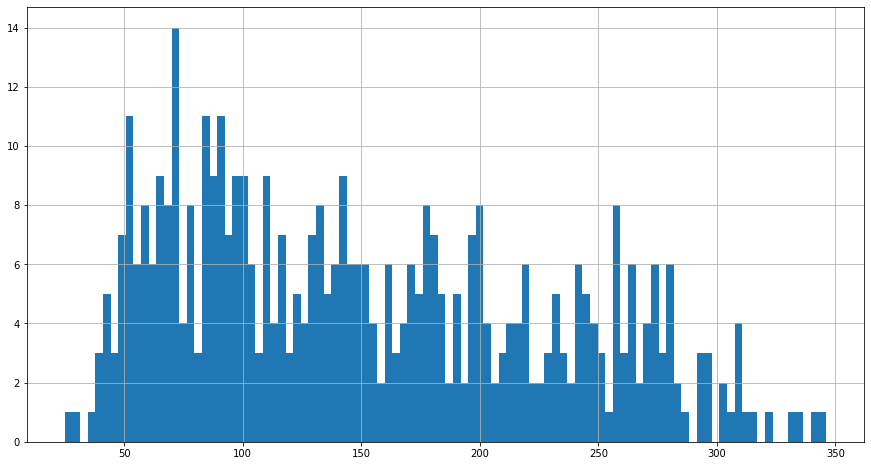

In [291]:
# target(hist)
whole_df['Target'].hist(bins=100, figsize=(15,8))

#### 히스토그램만으로는 새로운 정보를 얻기 어려웠다.

In [292]:
# 상관계수
rel_df = whole_df.corr()
rel_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


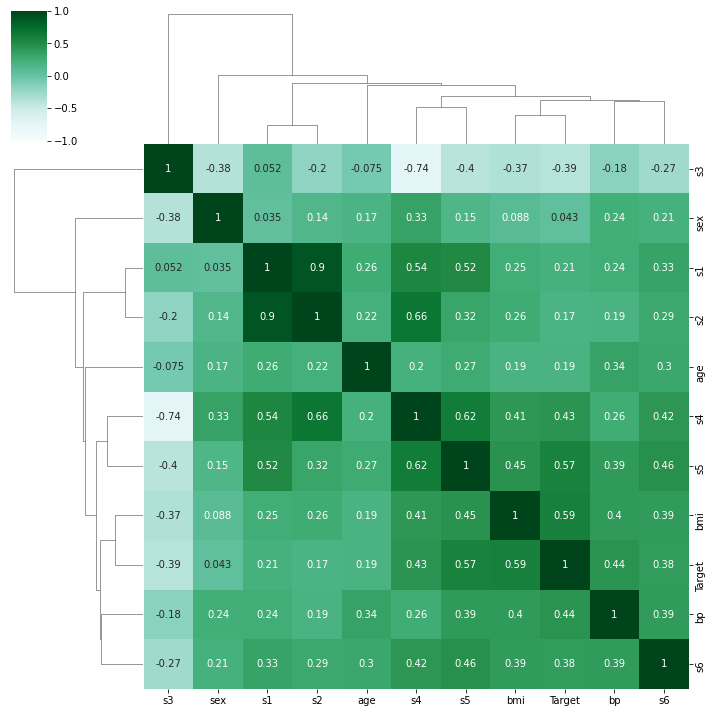

In [293]:
# 히트맵으로 상관관계 파악 

sns.clustermap(rel_df, annot = True, cmap = 'BuGn', vmin = -1, vmax = 1)

#### 히트맵으로 보아 Target인 당뇨 수치와 가장 관련있는건 bmi 수치와 s5임을 알 수 있다. 

## (2) 모델에 입력할 데이터 X 준비하기

- df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [294]:
type(df_X)

numpy.ndarray

#### df_X는 이미 numpy array 이다 .

## (3) 모델에 예측할 데이터 y 준비하기

- df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [295]:
type(df_y)

numpy.ndarray

#### df_y도 이미 numpy array 이다 .

## (4) train 데이터와 test 데이터로 분리하기

- X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [296]:
# train, test 데이터 분리 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=2000)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


## (5) 모델 준비하기

- 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
- 모델 함수를 구현해주세요.

In [297]:
X = whole_df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']].values
y = whole_df['Target'].values
print("X, y 준비완료!")

X, y 준비완료!


In [298]:
import numpy as np
W = np.random.rand(10)
b = np.random.rand()
W, b

(array([0.80073914, 0.2717189 , 0.67916642, 0.45575287, 0.25337174,
        0.17761704, 0.60182578, 0.67306447, 0.44757483, 0.10193478]),
 0.6920740289426878)

In [299]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions
print("모델 준비완료!")

모델 준비완료!


## (6) 손실함수 loss 정의하기

- 손실함수를 MSE 함수로 정의해주세요.

In [300]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
print("MSE 준비완료!")

MSE 준비완료!


In [301]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L
print("loss 준비완료!")

loss 준비완료!


## (7) 기울기를 구하는 gradient 함수 구현하기    

- 기울기를 계산하는 gradient 함수를 구현해주세요.

In [302]:
# gradient 함수 정의 
def gradient(X, W, b, y):
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
print("gradient 함수 준비완료!")

gradient 함수 준비완료!


In [303]:
# 시험삼아 gradient 하나 출력!
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [-1.36971863 -0.31229332 -4.28957908 -3.22763405 -1.54608132 -1.2688034
  2.8892675  -3.1467368  -4.13819338 -2.79602985]
db: -302.8828202679065


## (8) 하이퍼 파라미터인 학습률 설정하기

- 학습률, learning rate 를 설정해주세요
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [304]:
# 학습률 설정 
LEARNING_RATE = 0.0001

## (9) 모델 학습하기

- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [305]:
losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 21784.7363
Iteration 2000 : Loss 16639.8607
Iteration 3000 : Loss 13188.4475
Iteration 4000 : Loss 10872.1573
Iteration 5000 : Loss 9316.7401
Iteration 6000 : Loss 8271.3388
Iteration 7000 : Loss 7567.8061
Iteration 8000 : Loss 7093.4343
Iteration 9000 : Loss 6772.6762


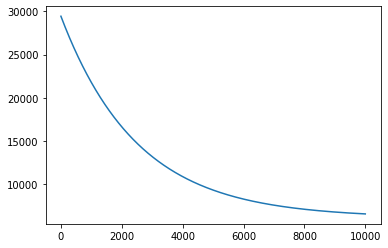

In [306]:
# loss 그래프 
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

#### 그래프가 너무 천천히 떨어진다. loss값이 떨어진 후 조금 더 안정적인 상태를 유지했으면 좋겠다 

In [307]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

4920.289853267349

In [308]:
# 학습률 바꿔서 다시 시도! 복잡한 데이터셋에서 학습률은 0.0001~0.01로 설정한다고 한다!
LEARNING_RATE = 0.001

losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 6053.7578
Iteration 2000 : Loss 5965.3763
Iteration 3000 : Loss 5887.0542
Iteration 4000 : Loss 5811.3559
Iteration 5000 : Loss 5738.0625
Iteration 6000 : Loss 5667.0899
Iteration 7000 : Loss 5598.3587
Iteration 8000 : Loss 5531.7929
Iteration 9000 : Loss 5467.3187


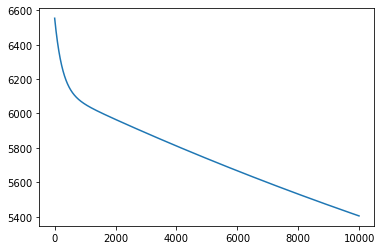

In [309]:
# loss 그래프 
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

#### loss가 5000대 이하로 줄지 않으니 mse가 4000대에 머물러있다. 

In [311]:
# 학습률을 많이 높여보자!
LEARNING_RATE = 0.05

losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 3818.9434
Iteration 2000 : Loss 3384.4200
Iteration 3000 : Loss 3204.6520
Iteration 4000 : Loss 3105.5970
Iteration 5000 : Loss 3043.8161
Iteration 6000 : Loss 3003.3561
Iteration 7000 : Loss 2976.1857
Iteration 8000 : Loss 2957.5949
Iteration 9000 : Loss 2944.6499
Iteration 10000 : Loss 2935.4727


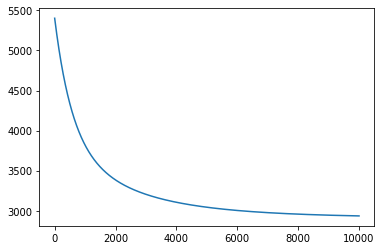

In [312]:
# loss 그래프 
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [46]:
# 상관계수가 높은 컬럼만 남겨 실험 
X = whole_df[['bmi', 'bp', 's4', 's5']].values
# y = whole_df['Target'].values
print("새로운 X 준비완료!")

새로운 X 준비완료!


In [47]:
# train, test 데이터 분리 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    df_y , 
                                                    test_size=0.2, 
                                                    random_state=50)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 4) (353,)
(89, 4) (89,)


#### 왜 안되는지 모르겠지만, 새로운 컬럼으로 데이터를 만들어 모델을 돌리면 에러가 난다. 

## (10) test 데이터에 대한 성능 확인하기

- test 데이터에 대한 성능을 확인해주세요.

In [313]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2808.0548412511935

## (11) 정답 데이터와 예측한 데이터 시각화하기
- x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

In [ ]:
# 위에서 했던 것과 같이 X축에는 total_bill을, y 축에는 tip을 두고 시각화를 해 보겠습니다.
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()